In [1]:
%matplotlib inline
import json
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from datetime import datetime
from preprocessing_func import process_corpus
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /Users/james/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/james/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/james/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/james/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
#Load the corpus and do the preprocessing
print("Loading Corpus and do the preprocessing")
Corpus=pd.read_json('./data/corpus.json')
Corpus=process_corpus(Corpus)
print("Successfully Loaded the corpus")

Loading Corpus and do the preprocessing


In [3]:
print(Corpus)

                            Company Name Ticker      CIK formType  \
0                      Track Group, Inc.   TRCK  1045942     10-K   
1            NAVISTAR INTERNATIONAL CORP    NAV   808450     10-K   
2                      INTL FCSTONE INC.   SNEX   913760     10-K   
3                     INGLES MARKETS INC  IMKTA    50493     10-K   
4                     IES Holdings, Inc.   IESC  1048268     10-K   
...                                  ...    ...      ...      ...   
1982                       AAIPHARMA INC   AAII  1013243     10-K   
1983  INTERPUBLIC GROUP OF COMPANIES INC    IPG    51644     10-K   
1984                     DUANE READE INC    DRD   895364     10-K   
1985                          TEREX CORP    TEX    97216     10-K   
1986                   MQ ASSOCIATES INC         1198233     10-K   

      Filing Year  isFraud                                               MD&A  \
0            2018        0  [item, man, agementxs, discussion, analysis, f...   
1        

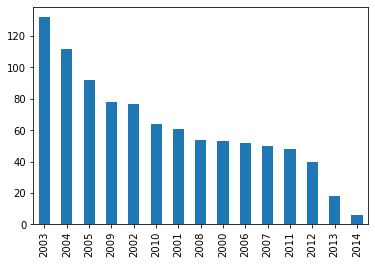

In [43]:
df1=Corpus.loc[Corpus['isFraud']==1]
df1['Filing Year'].value_counts().plot(kind="bar")
plt.show()

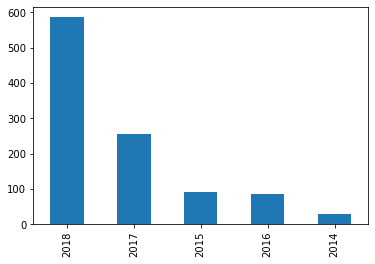

In [46]:
df2=Corpus.loc[Corpus['isFraud']==0]
df2['Filing Year'].value_counts().plot(kind="bar")
plt.show()

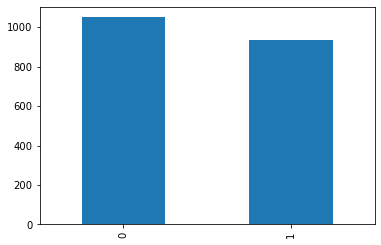

In [44]:
Corpus['isFraud'].value_counts().plot(kind="bar")
plt.show()

In [54]:
#obtain the training and testing dataset
Train_X, Test_X, Train_Y, Test_Y=model_selection.train_test_split(Corpus['Tokenized_text'],Corpus['isFraud'],test_size=0.3)

#Encoding the dataset
Encoder=LabelEncoder()
Train_Y=Encoder.fit_transform(Train_Y)
Test_Y=Encoder.fit_transform(Test_Y)

In [55]:
#Word Vectorization using TF-IDF
Tfidf_vect=TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['Tokenized_text'])

Train_X_Tfidf=Tfidf_vect.transform(Train_X)
Test_X_Tfidf=Tfidf_vect.transform(Test_X)

In [59]:
#Using Naive Bayes Classifier to predict the outcome
Naive=naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)

predictions_NB=Naive.predict(Test_X_Tfidf)
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
print("Confusion matrix is")
print(confusion_matrix(predictions_NB, Test_Y))
print("classification report is")
print(classification_report(predictions_NB, Test_Y))

Naive Bayes Accuracy Score ->  80.90452261306532
Confusion matrix is
[[306 102]
 [ 12 177]]
classification report is
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       408
           1       0.63      0.94      0.76       189

    accuracy                           0.81       597
   macro avg       0.80      0.84      0.80       597
weighted avg       0.86      0.81      0.82       597



In [57]:
#Using SVM to predict the outcome
SVM=svm.SVC(C=1.0,kernel='linear',degree=3,gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)

predictions_SVM=SVM.predict(Test_X_Tfidf)
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
print("Confusion matrix is")
print(confusion_matrix(predictions_SVM, Test_Y))
print("classification report is")
print(classification_report(predictions_SVM, Test_Y))

SVM Accuracy Score ->  92.29480737018424
Confusion matrix is
[[307  35]
 [ 11 244]]
classification report is
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       342
           1       0.87      0.96      0.91       255

    accuracy                           0.92       597
   macro avg       0.92      0.93      0.92       597
weighted avg       0.93      0.92      0.92       597



In [58]:
#Using Linear Regression to predict the outcome
LR=LogisticRegression(C=100, random_state=0, max_iter=1000)
LR.fit(Train_X_Tfidf,Train_Y)
predictions_LR=LR.predict(Test_X_Tfidf)
print("LR Accuracy Score -> ",accuracy_score(predictions_LR, Test_Y)*100)
print("Confusion matrix is")
print(confusion_matrix(predictions_LR, Test_Y))
print("classification report is")
print(classification_report(predictions_LR, Test_Y))

LR Accuracy Score ->  95.30988274706867
Confusion matrix is
[[309  19]
 [  9 260]]
classification report is
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       328
           1       0.93      0.97      0.95       269

    accuracy                           0.95       597
   macro avg       0.95      0.95      0.95       597
weighted avg       0.95      0.95      0.95       597

